<a href="https://colab.research.google.com/github/AndrewHolm/mnist-arduino-tflite/blob/main/MNIST2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4091 - accuracy: 0.8877 - val_loss: 0.2524 - val_accuracy: 0.9272
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2346 - accuracy: 0.9323 - val_loss: 0.2140 - val_accuracy: 0.9371
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2002 - accuracy: 0.9416 - val_loss: 0.1884 - val_accuracy: 0.9451
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1784 - accuracy: 0.9478 - val_loss: 0.1758 - val_accuracy: 0.9491
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1613 - accuracy: 0.9520 - val_loss: 0.1792 - val_accuracy: 0.9478
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1487 - accuracy: 0.9560 - val_loss: 0.1587 - val_accuracy: 0.9519
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1390 - accuracy: 0.9595 - val_loss: 0.1562 - val_accuracy:

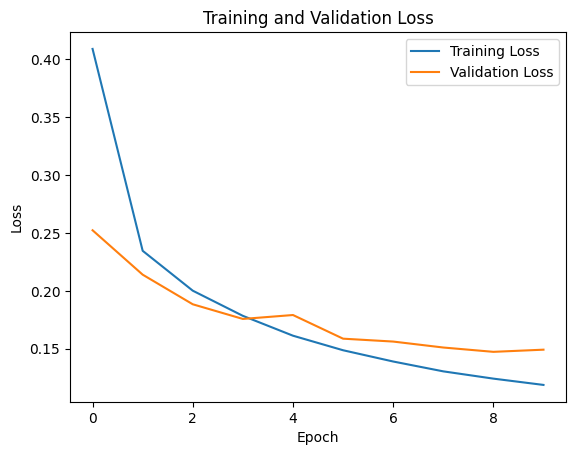

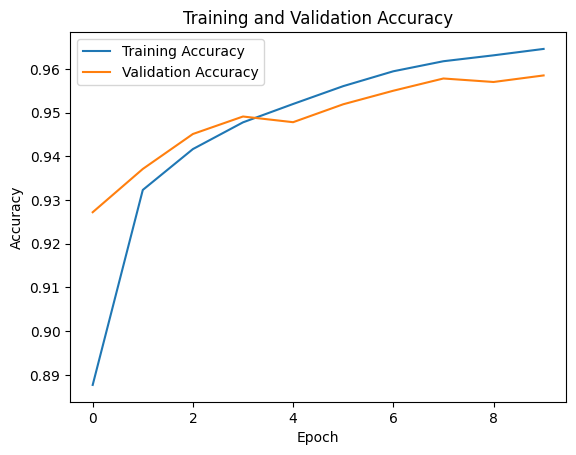

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the input images
x_train = x_train / 255.0
x_test = x_test / 255.0

# Define the model architecture
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(20, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model and record the training history
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Plot the training and validation loss over time
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy over time
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# convert the model 
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [ ]:
# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
# convert to a c header file 
!apt-get update && apt-get -qq install xxd
!xxd -i model.tflite > new_model.h

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:4 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages [1,008 kB]
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:10 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Get:12 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2,669 kB]
Hit:13 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal In

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# gather one of each image 
arr_zero = np.array(x_train[1])
arr_one = np.array(x_train[14])
arr_two = np.array(x_train[5])
arr_three = np.array(x_train[7])
arr_four = np.array(x_train[2])
arr_five = np.array(x_train[0])
arr_six = np.array(x_train[13])
arr_seven = np.array(x_train[15])
arr_eight = np.array(x_train[17])
arr_nine = np.array(x_train[4])

all_digit_test = np.array([arr_zero, arr_one, arr_two, arr_three, arr_four, arr_five, arr_six, arr_seven, arr_eight, arr_nine])

all_digit_test.shape



(10, 28, 28)

In [ ]:
# testing storing array is csv to be used on arduino
import csv
arr = arr_zero
with open('zero.csv', 'w') as f:
    mywriter = csv.writer(f, delimiter=',')
    mywriter.writerows(arr_zero)             
 

In [ ]:
# testing writing the array to a binary file to be used on arduino
with open('array.bin', 'wb') as f:
    arr_zero.tofile(f)

# convert the binary file to a C-style header file using xxd
!xxd -i array.bin > array.h

print(arr_zero.shape)

(28, 28)


Inference on one input, 80 - 150 ms

In [ ]:
# testing inference time on one input
import time

start_time = time.time()
model.predict(arr_one_flat)
end_time = time.time()

inference_time = end_time - start_time
inference_time_ms =inference_time * 1000
print("Inference time: ", inference_time_ms)

1/1 [==============================] - 0s 29ms/step
Inference time:  92.9100513458252


Inference on 10 inputs, 25 - 50 ms

In [ ]:
# testing inference time one 10 inputs
start_time = time.time()
print(model.predict(all_digit_test))
end_time = time.time()

inference_time = end_time - start_time
inference_time_ms =inference_time * 1000
print("Inference time: ", inference_time_ms)


In [ ]:
# testing input on entire testing set (10k inputs)
start_time = time.time()
print(model.predict(x_test))
end_time = time.time()

inference_time = end_time - start_time
inference_time_ms =inference_time * 1000
print("Inference time: ", inference_time_ms)